This analysis is in the order of Female then Male

In [1]:
install.packages('qtl') #Main package, for analysis
install.packages('qtlcharts') #accessory, for displaying graphs
install.packages('LinkageMapView') #accessory, for displaying linkage maps
install.packages('rcompanion')# for plotNormalHistogram

Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'qtl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\RtmpycSy5X\downloaded_packages


Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'qtlcharts' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\RtmpycSy5X\downloaded_packages


Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'LinkageMapView' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\RtmpycSy5X\downloaded_packages


Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
           binary source needs_compilation
rcompanion  2.4.0  2.4.1             FALSE



installing the source package 'rcompanion'




In [2]:
library(qtl) #load packages
library(qtlcharts)
library(LinkageMapView)
library(rcompanion)

In [3]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  FemaleMap_Field2020.csv
First Genotype (homozygous) (For example ll):  ll
Second Genotype (heterozygous) (for example lm):  lm
Column Number:  60


Warning message in FUN(X[[i]], ...):
"The phenotype value " "  was interpreted as missing."


 --Read the following data:
	 296  individuals
	 1100  markers
	 62  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,2,4,5,7,8,9,10,11,12,13,14,16,17,18,19; use jittermap()."


 --Cross type: bc 


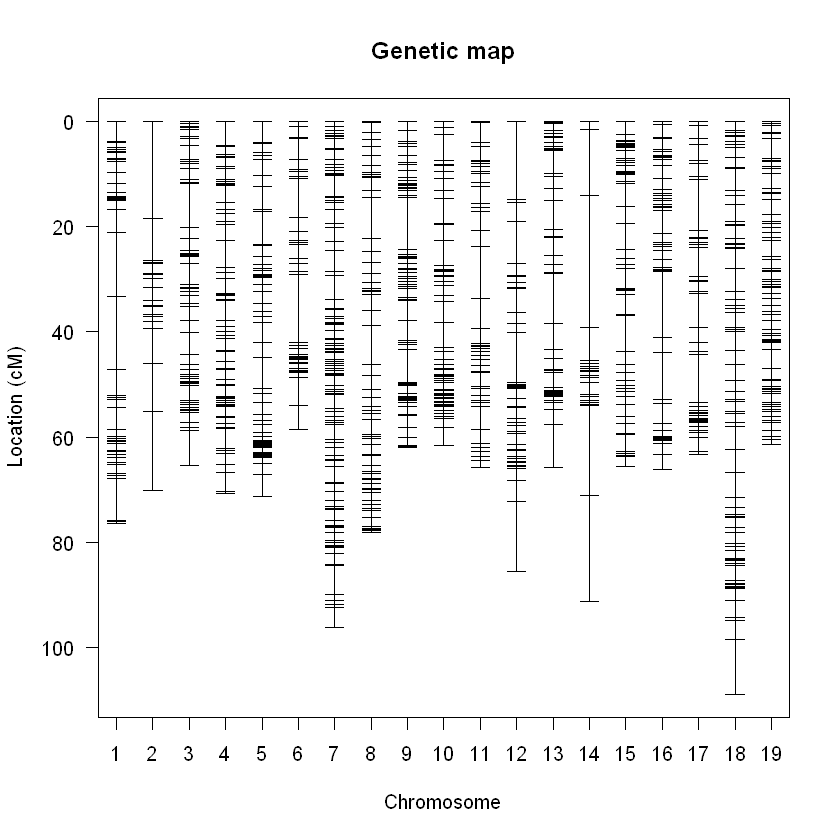

In [4]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

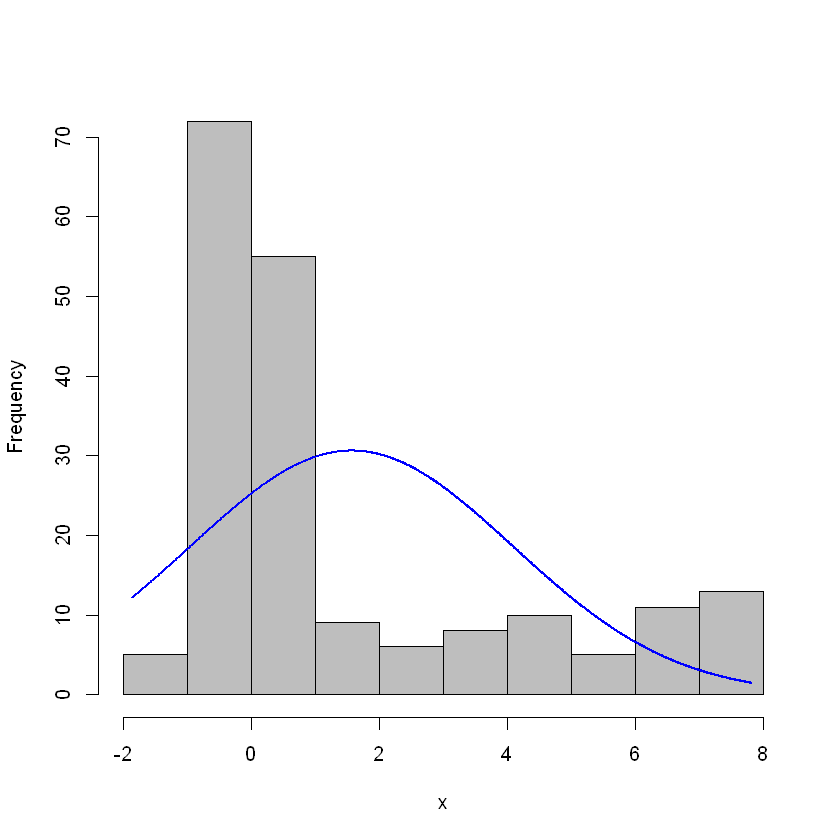

In [5]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this dataset. Will need to be analyized. 

LOD thresholds (1000 permutations)
   [,1]
5% 4.26
1% 5.06

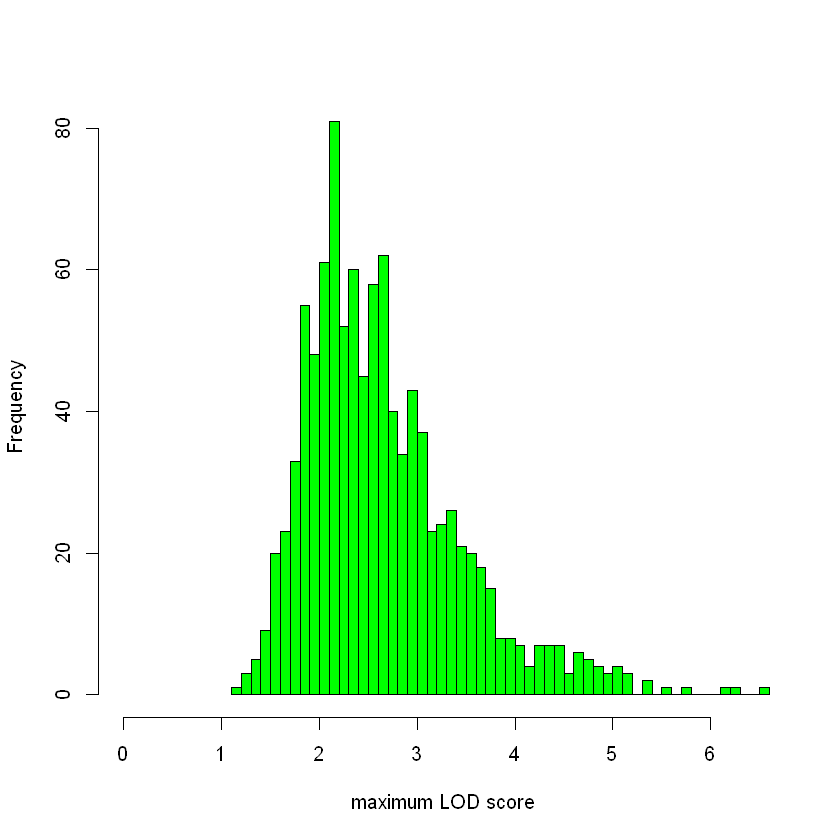

In [6]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
summary(TraitCIM1000,alpha=c(.05,.01))

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
1_20356240,1,63.787040,1.5071916
c2.loc33,2,33.000000,1.1899303
3_5596857,3,31.779026,1.8082564
4_2873313,4,11.454011,1.4344257
c5.loc55,5,55.000000,1.3742394
c6.loc47,6,47.000000,1.4479493
c7.loc62,7,62.000000,1.2289126
8_19192553,8,67.910047,1.2482323
c9.loc3,9,3.000000,0.5354894


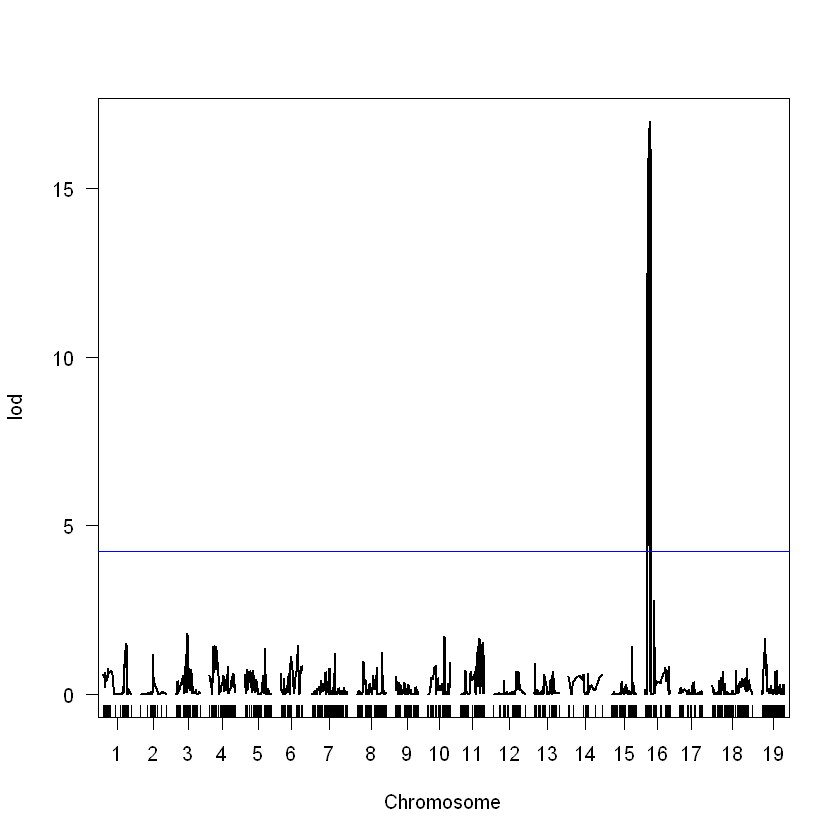

In [7]:
#Deterime LOD Values
LOD5 <- summary(TraitCIM1000,alpha=c(.05))
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)
write.csv(TraitCIM,"CarbarylBioassay_diff_table.csv")

Chromosome?  16


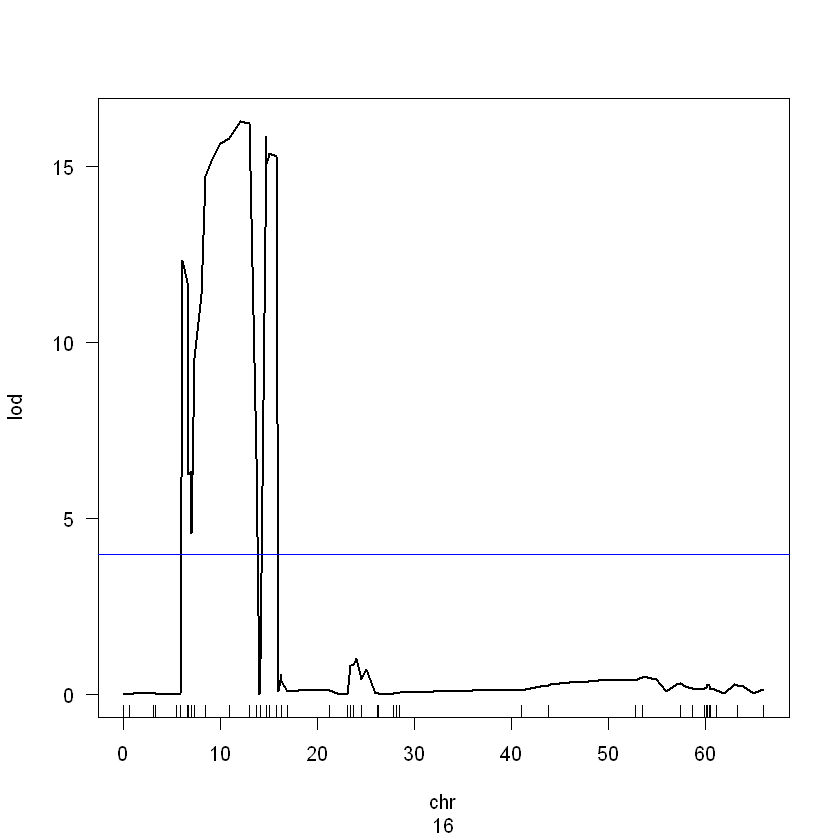

In [7]:
#Chromosomal Analysis
chr <- as.numeric(readline("Chromosome? ")) #collect chromosome to look at
plot(TraitCIM, chr = chr,xlab = c("chr",chr)) #Plot chr LOD scores
abline(h = LOD5, col = "blue") #Statistically Significant

In [8]:
bayesint(TraitCIM, chr = chr, prob=0.95, expandtomarkers=TRUE) #calculate bayesian interval
lodint(TraitCIM, chr = chr,expandtomarkers = TRUE ) #calculate LOD Support interval

,chr,pos,lod
,<fct>,<dbl>,<dbl>
16_2745439,16,8.433011,14.71276
c16.loc12,16,12.000000,16.27968
16_8286852,16,15.056019,15.35475


,chr,pos,lod
,<fct>,<dbl>,<dbl>
16_2745439,16,8.433011,14.7127635
c16.loc12,16,12.000000,16.2796834
16_13270028,16,16.266023,0.5663206


In [9]:
p <- as.numeric(readline("Position for analysis: "))
qtl <- makeqtl(Map, chr = chr, pos = p, what="prob") #pulls genotype probabilities
fitqtl <- fitqtl(Map, pheno.col=colNum, qtl = qtl, covar=NULL,
       method= "hk",model="normal",
       dropone=TRUE, get.ests=TRUE,run.checks=TRUE,
       tol=1e-4, maxit=1000, forceXcovar=FALSE) #sees how well our data fits a given formula 
          # If you see "error: object of type 'closure' is not subsettable", remove "formula," from the fitqtl argument list.
summary(fitqtl) #Print results of the analysis

Position for analysis:  12.000000


Warning message in getsex(cross):
"127 individuals with missing sex; assuming they're female"
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
"Dropping 102 individuals with missing phenotypes.
"
Warning message in getsex(cross):
"127 individuals with missing sex; assuming they're female"



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 194 

Full model result
----------------------------------  
Model formula: y ~ Q1 

       df        SS         MS      LOD   %var Pvalue(Chi2)    Pvalue(F)
Model   1  374.2786 374.278595 15.22274 30.327 1.110223e-16 1.110223e-16
Error 192  859.8646   4.478461                                          
Total 193 1234.1432                                                     


Estimated effects:
-----------------
              est      SE      t
Intercept  1.6073  0.1520 10.572
16@12.0   -2.8152  0.3079 -9.142


In [10]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  MaleMap_2021_July14.csv
First Genotype (homozygous) (For example ll):  nn
Second Genotype (heterozygous) (for example lm):  np
Column Number:  60


 --Read the following data:
	 294  individuals
	 1128  markers
	 61  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19; use jittermap()."


 --Cross type: bc 


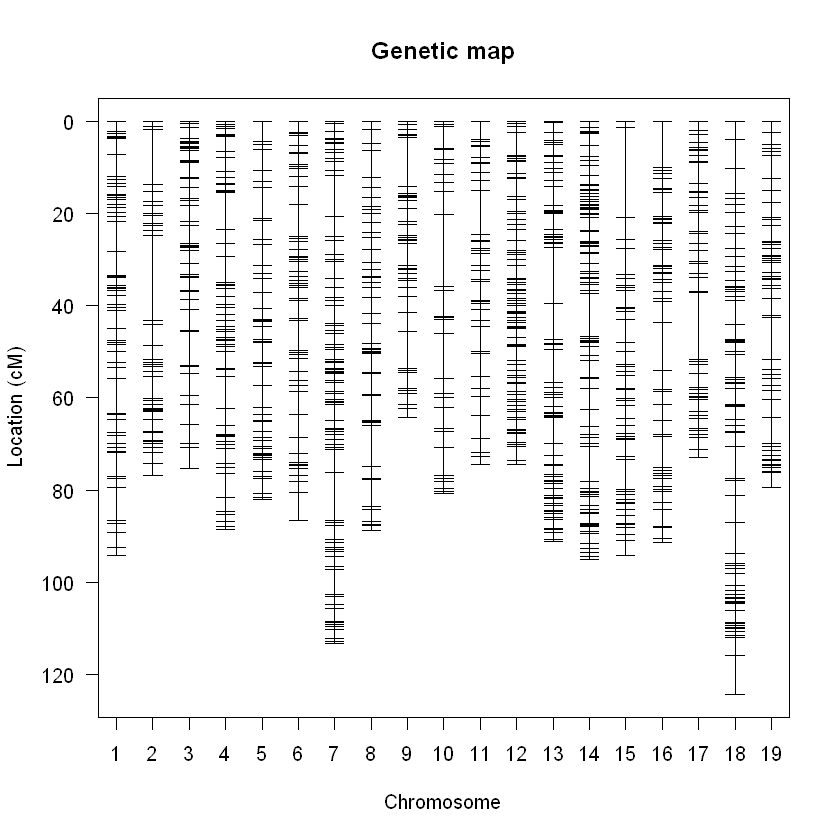

In [11]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

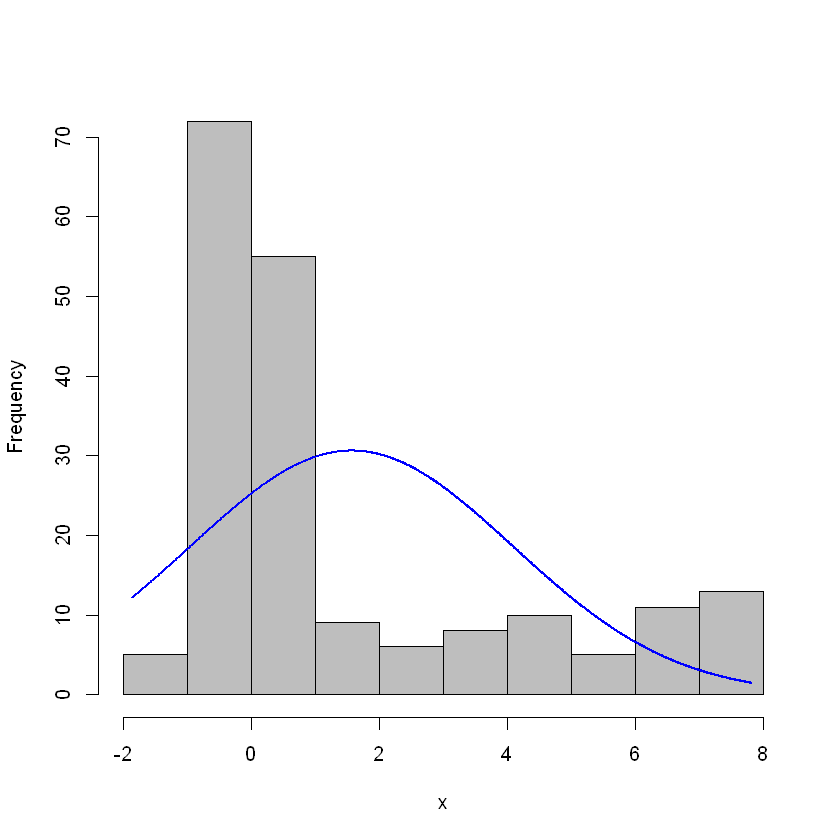

In [12]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this data. 

LOD thresholds (1000 permutations)
   [,1]
5% 4.00
1% 4.93

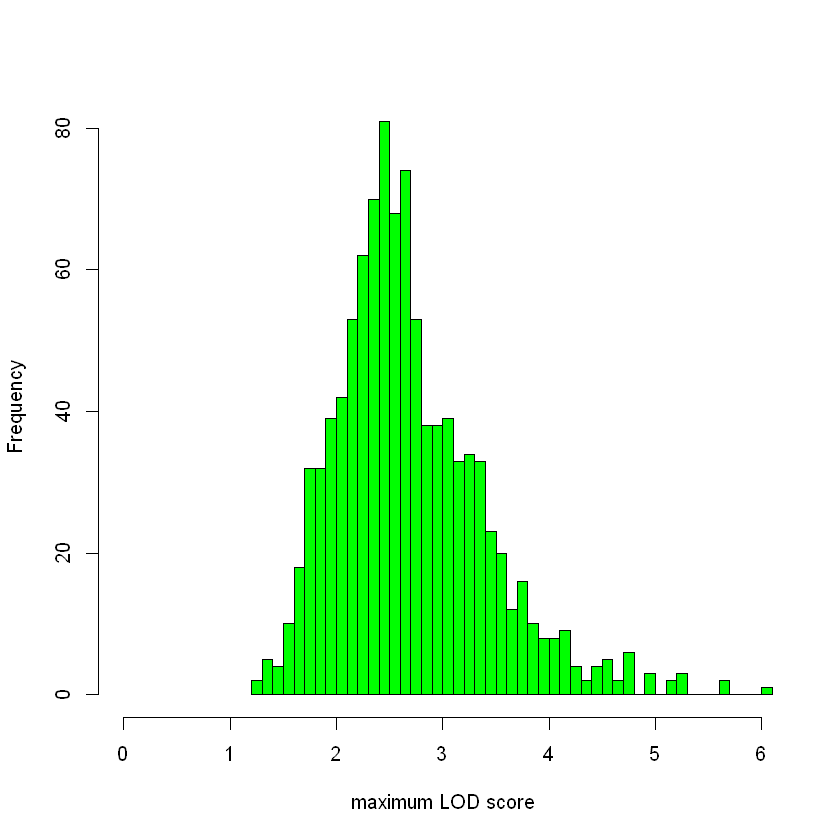

In [13]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
summary(TraitCIM1000,alpha=c(.05,.01))

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
c1.loc15,1,15.00000,1.3602165
c2.loc29,2,29.00000,1.4642280
c3.loc20,3,20.00000,1.4879165
c4.loc14,4,14.00000,3.0978233
18_30393961,5,21.53601,1.3885409
c6.loc13,6,13.00000,1.1823672
c7.loc91,7,91.00000,0.4897151
c8.loc76,8,76.00000,0.4969977
c9.loc7,9,7.00000,0.9446379


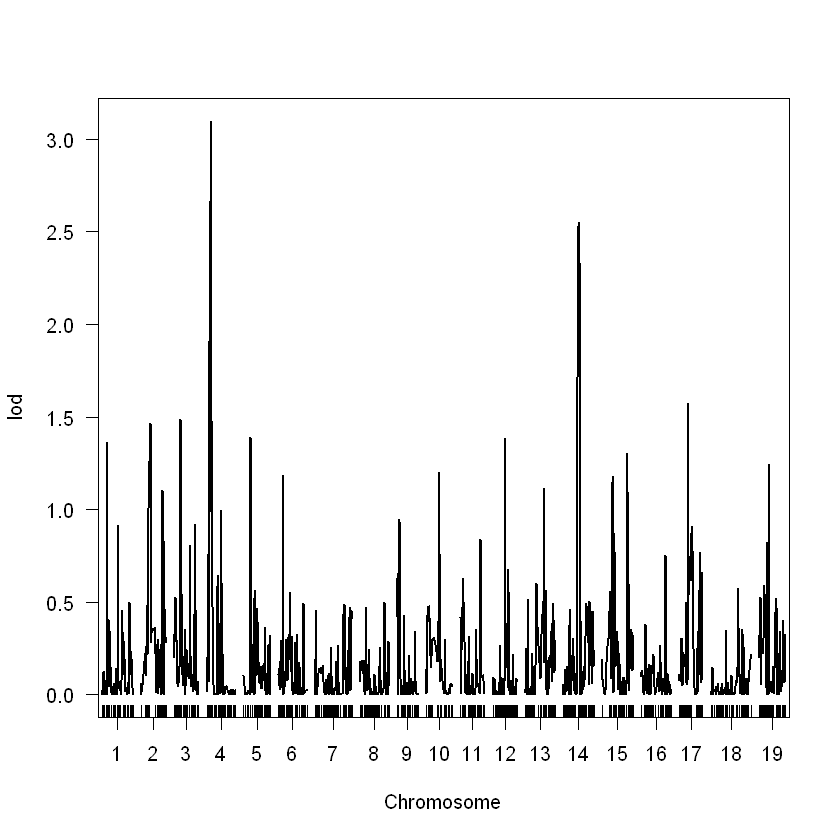

In [14]:
#Deterime LOD Values
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)

Chromosome?  4


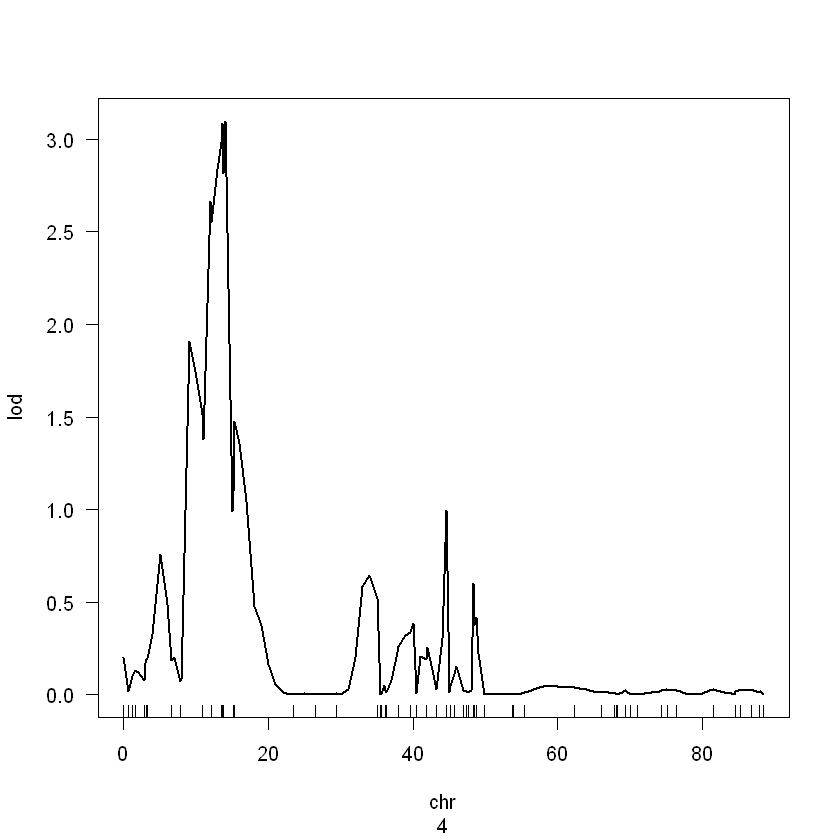

In [15]:
#Chromosomal Analysis
chr <- as.numeric(readline("Chromosome? ")) #collect chromosome to look at
plot(TraitCIM, chr = chr,xlab = c("chr",chr)) #Plot chr LOD scores
abline(h = LOD5, col = "blue") #Statistically Significant

In [16]:
bayesint(TraitCIM, chr = chr, prob=0.95, expandtomarkers=TRUE) #calculate bayesian interval
lodint(TraitCIM, chr = chr,expandtomarkers = TRUE ) #calculate LOD Support interval

,chr,pos,lod
,<fct>,<dbl>,<dbl>
4_2007592,4,7.853008,0.068615099
c4.loc14,4,14.000000,3.097823265
4_6046549,4,23.432018,0.001150797


,chr,pos,lod
,<fct>,<dbl>,<dbl>
4_2007592,4,7.853008,0.0686151
c4.loc14,4,14.000000,3.0978233
4_3902010,4,15.081015,1.1312301


In [17]:
p <- as.numeric(readline("Position for analysis: "))
qtl <- makeqtl(Map, chr = chr, pos = p, what="prob") #pulls genotype probabilities
fitqtl <- fitqtl(Map, pheno.col=colNum, qtl = qtl, covar=NULL,
       method= "hk",model="normal",
       dropone=TRUE, get.ests=TRUE,run.checks=TRUE,
       tol=1e-4, maxit=1000, forceXcovar=FALSE) #sees how well our data fits a given formula 
          # If you see "error: object of type 'closure' is not subsettable", remove "formula," from the fitqtl argument list.
summary(fitqtl) #Print results of the analysis

Position for analysis:  14.000000


Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
"Dropping 100 individuals with missing phenotypes.
"
Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 194 

Full model result
----------------------------------  
Model formula: y ~ Q1 

       df         SS        MS      LOD     %var Pvalue(Chi2)    Pvalue(F)
Model   1   90.17091 90.170913 3.196155 7.306357 0.0001247932 0.0001379854
Error 192 1143.97228  5.958189                                            
Total 193 1234.14319                                                      


Estimated effects:
-----------------
              est      SE      t
Intercept  1.6067  0.1757  9.145
4@14.0    -2.0729  0.5328 -3.890
